# Análisis de series de tiempo

El análisis de series de tiempo comprende aquellos métodos para poder estudiar los datos que dependen primordialmente del tiempo. La predicción de eventos temporales a través de los datos es una tarea común en diferentes disciplinas.

- Medias móviles

- Suavisación exponencial

- Arima

In [1]:
# Importamos las librerias correspondientes para el manejo de las series de tiempo:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
# Estilos particulares de las gráficas que se generarán en el presente trabajo

In [3]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
# Importamos los datos de ventas de una tienda

In [5]:
df = pd.read_excel("Data_sets/Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
# Filtramos los datos para analizar el comportamiento de las ventas solo de muebles

In [9]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [10]:
furniture.shape

(2121, 21)

In [11]:
# Verificamos el rango de tiempo con el que se cuenta para el análisis

furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Preparación de los datos

Esta etapa incluye la remoción de columnas que no son necesarias, así como revisar por valores faltantes en las filas, y de agrupar los datos por fechas, entre otras actividades.

In [12]:
# Verificamos las columnas existentes en el DataFrame
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
# Únicamente se necesitan las fechas y las ventas, por lo cúal
# se deben eliminar todas las demas columnas. Para ello crearemos
# una lista con las columnas que no se necesitan.

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
        'Quantity', 'Discount', 'Profit']

In [14]:
# Verificamos que los tamaños no sean iguales.

print(len(furniture.columns))
print(len(cols))

21
19


In [15]:
# Eliminamos las columnas mediante el método drop:

furniture.drop(cols, axis=1, inplace=True)
furniture.shape

(2121, 2)

In [16]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [17]:
# Ordenamos el DataFrame por la columna de fecha:

furniture = furniture.sort_values('Order Date')
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [18]:
# Revisamos por valores nulos en alguna de las columnas
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [19]:
furniture.shape

(2121, 2)

In [20]:
furniture = furniture.groupby('Order Date')
furniture

In [21]:
furniture=furniture['Sales'].sum().reset_index().set_index('Order Date')

In [22]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

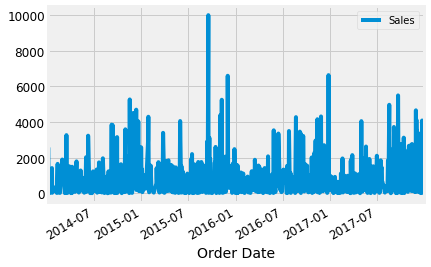

In [23]:
furniture.plot(kind="line")
plt.show()

## Prueba de Dickey-Fuller para estacionalidad (Stationary/Non-stationary)

**Stationary**

Una data se puede considerar estacionaria si no hay una tendencia o efectos debidos a la periodicidad. Los estadísticos calculados de estas series de tiempo son consistentes a traves de los intervalos de tiempo que se seleccionen. Este tipo de serie de datos son más sencillos de modelar.

**Non - Stationary**

Las observaciones de una data de serie de tiempo no estacional si presentan efectos debido a los periodos de tiempo y tambien una tendencia a través del tiempo.

In [24]:
# Volvemos a agrupar los datos, pero en esta ocasión por mes, para ello
# se ocupa el método resample(). El argumento de resample indicará el intervalo
# de tiempo para agrupar. MS=monthly

y = furniture['Sales'].resample('MS').mean()
y1= furniture['Sales'].resample('MS').count()

In [25]:
# Número de incidencias por mes en el 2016
y1["2016"]

Order Date
2016-01-01    15
2016-02-01    11
2016-03-01    21
2016-04-01    19
2016-05-01    22
2016-06-01    16
2016-07-01    17
2016-08-01    17
2016-09-01    24
2016-10-01    19
2016-11-01    25
2016-12-01    26
Freq: MS, Name: Sales, dtype: int64

In [26]:
# Promedio de ventas en 2017 por mes 
y["2017"]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

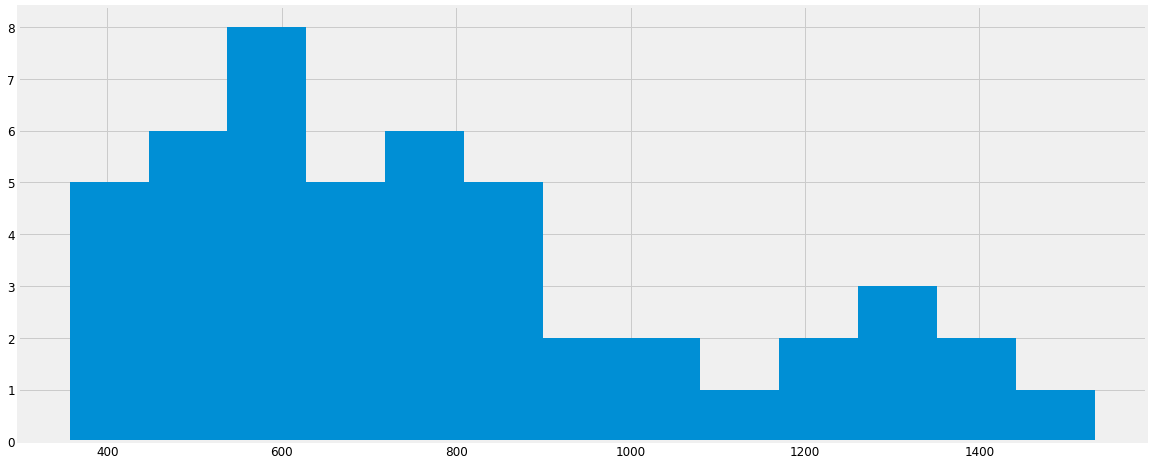

In [47]:
series = y
series.hist(bins=13)
plt.show()
1
series = y
2
series.hist(bins=13)
3
plt.show()



In [50]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print("Media 1:",mean1,";", "Media 2:",mean2)
print("Varianza 1:",var1,";", "Varianza 2:",var2)

Media 1: 772.8285675058427 ; Media 2: 795.33417783484
Varianza 1: 92851.48803913775 ; Varianza 2: 91313.79505875475


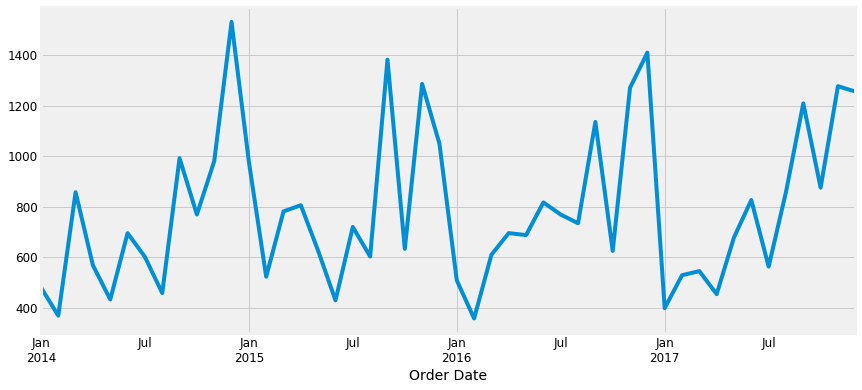

In [27]:
y.plot(figsize=(13, 6))
plt.show()

Algunos patrones se pueden observar de la gráfica. Primero, es evidente la presencia de periodicidad. Las ventas son siempre altas al final de cada año, y bajas al inicio de cada año. Existe siempre una tendencia creciente en todos los años, con un para de bajos en los meses a mediado de año. Es posible visualizar nuestros datos mediante una descomposición de los datos. Esto nos permitirá observar la serie desde 3 componentes diferentes: tendencia, periodicidad y ruido:

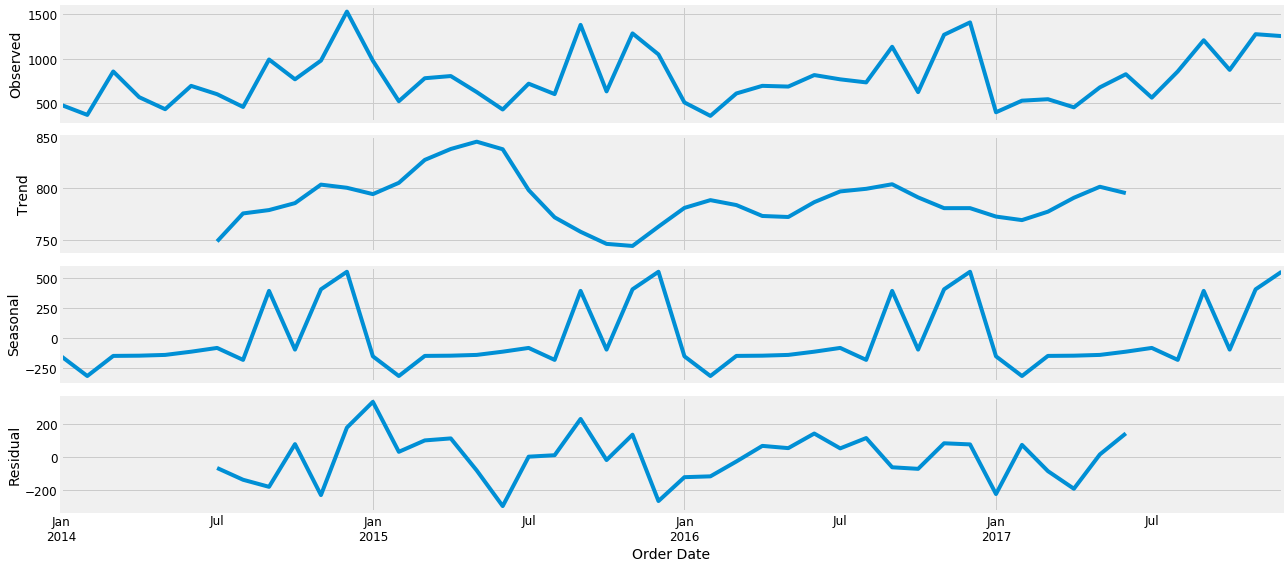

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Las anteriores gráficas nos muestran que las ventas de muebles son inestables, aunque cuentan con periodicidad muy presente.

## ARIMA

ARIMA (Autoregressive Integrated Moving Average) es uno de los métodos para realización de pronósticos mas usados comunmente. En estos modelos se toma en consideración la periodicidad, la tendencia y el ruido.

### Proceso autoregresivo AR(p)

El modelo autorregresivo más elemental es el AR(1), también conocido como cadena de Markov. El valor a predecir se explica usando un valor precedente, más un término de error:

\begin{align*}
\Large
y_t=\mu+\Phi_1y_{t-1}+a_t
\end{align*}

Donde la variable $a_t$ es un **ruido blanco**

El proceso general **AR(p)** de orden p se representa de la siguiente forma:

\begin{align*}
\Large
y_t=\mu+\Phi_1y_{t-1}+\Phi_2y_{t-2}+...+\Phi_py_{t-n}+a_t
\end{align*}

El valor de **p** estará definido por la periodicidad del modelo a predecir, pudiendo ser mensual, bimestral, trimestral, cuatrimestral, semestral, o incluso anual. Para cualquiera de los casos con **p>3** entonces el modelo se conocerá como **SAR** (Seasonal AR)

**Ejemplos:**

\begin{align*}
AR(1): y_t=\mu+\Phi_1y_{t-1}+a_t
\end{align*}

\begin{align*}
AR(2): y_t=\mu+\Phi_1y_{t-1}+\Phi_2y_{t-2}+a_t
\end{align*}

**Datos trimestrales (4 periodos)**
En este caso, como la periodicidad es muy fuerte, es posible suponer que el comportamiento del trimestre acutal, será semejante al promedio en el trimestre del año anterior.
\begin{align*}
SAR(4): y_t=\mu+\bar{\Phi}_1y_{t-4}+a_t
\end{align*}

E incluso es posible decir que el comportamiento del trimestre actual se puede ver influenciado por el comportamiento de los mismos trimestres, pero de los 2 años anteriores:
\begin{align*}
SAR(8): y_t=\mu+\bar{\Phi}_1y_{t-4}+\bar{\Phi}_2y_{t-8}+a_t
\end{align*}

**Datos mensuales (12 periodos)**
En este caso, el comportamiento del mes acutal, será semejante al comportamiento del mismo mes en el año anterior.
\begin{align*}
SAR(12): y_t=\mu+\bar{\Phi}_1y_{t-12}+a_t
\end{align*}


\begin{align*}
SAR(24): y_t=\mu+\bar{\Phi}_1y_{t-12}+\bar{\Phi}_2y_{t-24}+a_t
\end{align*}

### Procesos de medias móviles MA(q) y su uso en ARIMA

Técnica para predecir una variable a través de sus valores pasados, en la que se consideran subgrupos de los valores pasados. para el caso de **ARMA**, las médias moviles se van a usar para tratar de predecir el comportamiento del ruido. Para el caso de **ARMA(1,1)** resulta en:

\begin{align*}
\Large
y_t=\mu+\Phi_1y_{t-1}+a_t+\theta_1a_{t-1}
\end{align*}

In [29]:
# p = autoregresivo
# d = orden de diferenciación
# q = proceso de media móvil


p = d = q = range(0, 2)

In [30]:
print(list(p))
print(list(d))
print(list(q))

[0, 1]
[0, 1]
[0, 1]


In [31]:
# Generamos todas las posibles combinaciones entre las 3 variables:

pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [32]:
# Generamos un nuevo grupo de combinaciones, el cual considerará los 12 meses.
# Nuevamnte hay que llamar a la función completa, ya que no se puede modificar
# la tupla pdq

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [33]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [34]:
print("Ejemplos de combinación de parametros para ARIMA periodicidad (Seasonal ARIMA)...")
print("SARIMAX: " + str(pdq[1]) + " x " + str(seasonal_pdq[1]))
print("SARIMAX: " + str(pdq[1]) + " x " + str(seasonal_pdq[2]))
print("SARIMAX: " + str(pdq[2]) + " x " + str(seasonal_pdq[3]))
print("SARIMAX: " + str(pdq[2]) + " x " + str(seasonal_pdq[4]))

Ejemplos de combinación de parametros para ARIMA periodicidad (Seasonal ARIMA)...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


El siguiente paso, es buscar la combinación de parametros óptima que logre el mejor desempeño para el modelo:

In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Creamos el modelo:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            # Almacenamos los resultados del modelo
            results = mod.fit()
            
            # Imprimimos las combinaciones junto con su AIC (Akaike Information Criterion):
            print("ARIMA" + str(param) + " x " + str(param_seasonal) + "12 - AIC:" + str(results.aic))
        except:
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 12)12 - AIC:769.0817523205916


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (0, 0, 1, 12)12 - AIC:1446.5593227130305
ARIMA(0, 0, 0) x (0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0) x (1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 0, 1, 12)12 - AIC:1172.208674145885
ARIMA(0, 0, 0) x (1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1) x (0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1) x (0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1) x (0, 1, 0, 12)12 - AIC:466.56074298091255


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 0, 12)12 - AIC:499.574045803366
ARIMA(0, 0, 1) x (1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA(0, 0, 1) x (1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 1, 0) x (0, 0, 0, 12)12 - AIC:677.894766843944


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (0, 0, 1, 12)12 - AIC:1250.2320272227237
ARIMA(0, 1, 0) x (0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0) x (1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0) x (1, 0, 1, 12)12 - AIC:1550.2003231687213
ARIMA(0, 1, 0) x (1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1) x (0, 0, 0, 12)12 - AIC:649.9056176816999
ARIMA(0, 1, 1) x (0, 0, 1, 12)12 - AIC:2683.886393076119
ARIMA(0, 1, 1) x (0, 1, 0, 12)12 - AIC:458.8705548482932
ARIMA(0, 1, 1) x (1, 0, 0, 12)12 - AIC:486.18329774427826
ARIMA(0, 1, 1) x (1, 0, 1, 12)12 - AIC:3144.981130223559
ARIMA(0, 1, 1) x (1, 1, 0, 12)12 - AIC:310.75743684172994
ARIMA(1, 0, 0) x (0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0) x (0, 0, 1, 12)12 - AIC:1343.1777877543473
ARIMA(1, 0, 0) x (0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0) x (1, 0, 0, 12)12 - AIC:480.92593679352177


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (1, 0, 1, 12)12 - AIC:1243.8088413604426
ARIMA(1, 0, 0) x (1, 1, 0, 12)12 - AIC:304.4664675084554
ARIMA(1, 0, 1) x (0, 0, 0, 12)12 - AIC:665.779444218685
ARIMA(1, 0, 1) x (0, 0, 1, 12)12 - AIC:82073.66352065578
ARIMA(1, 0, 1) x (0, 1, 0, 12)12 - AIC:468.3685195814987
ARIMA(1, 0, 1) x (1, 0, 0, 12)12 - AIC:482.5763323876739
ARIMA(1, 0, 1) x (1, 0, 1, 12)12 - AIC:nan


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x (1, 1, 0, 12)12 - AIC:306.0156002122138
ARIMA(1, 1, 0) x (0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0) x (0, 0, 1, 12)12 - AIC:1205.945960251849
ARIMA(1, 1, 0) x (0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0) x (1, 0, 0, 12)12 - AIC:475.34036587848493


C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12)12 - AIC:1269.52639945458
ARIMA(1, 1, 0) x (1, 1, 0, 12)12 - AIC:300.6270901345443
ARIMA(1, 1, 1) x (0, 0, 0, 12)12 - AIC:649.0318019835024
ARIMA(1, 1, 1) x (0, 0, 1, 12)12 - AIC:101786.44160210912
ARIMA(1, 1, 1) x (0, 1, 0, 12)12 - AIC:460.4762687610111
ARIMA(1, 1, 1) x (1, 0, 0, 12)12 - AIC:469.52503546608614
ARIMA(1, 1, 1) x (1, 0, 1, 12)12 - AIC:2651.570039388935
ARIMA(1, 1, 1) x (1, 1, 0, 12)12 - AIC:297.7875439553055


Como la combinación **SARIMAX(1,1,1) x (1,1,0,12)** obtuvo el valor más bajo de AIC podemos considerar esta como la solución óptima. Lo siguiente es revisar la información para dicho modelo:

In [36]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.894
Date:                            Wed, 12 Feb 2020   AIC                            297.788
Time:                                    15:40:10   BIC                            302.152
Sample:                                01-01-2014   HQIC                           298.816
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360   

In [37]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


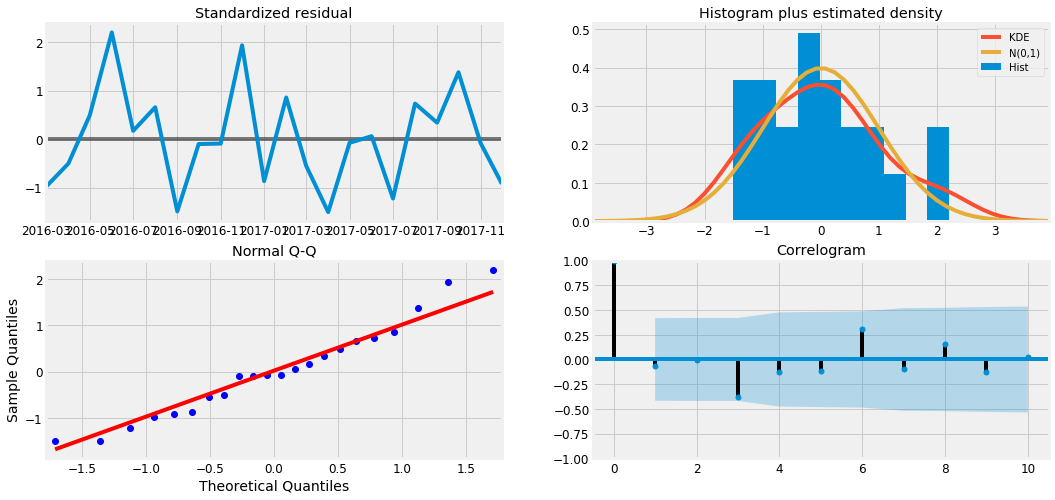

In [38]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

El modelo contiene varios aspectos a revisar. Sin embargo se puede considerar que los residuales casi asemejan una distribución normal.
El siguiente paso es realizar una predicción con el modelo. Para ello solo se ocuparán los datos correspondientes al 2017 en adelante:

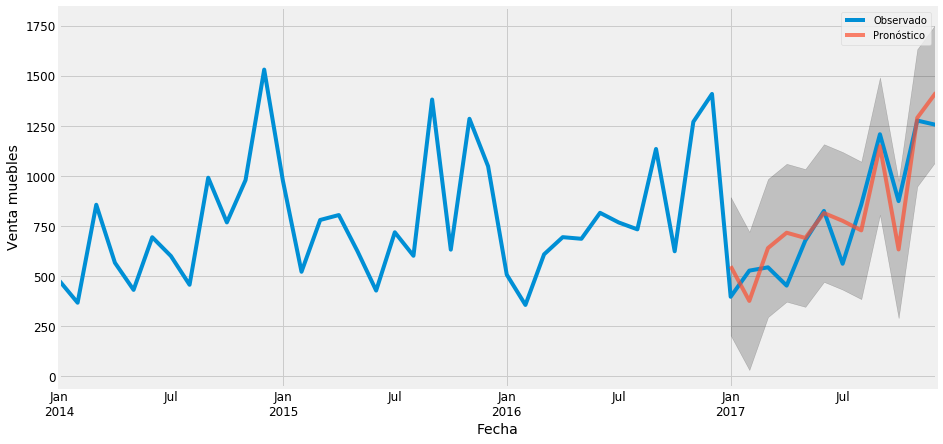

In [39]:
# Creamos el objeto que almacenará las predicciones:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

# Almacenamos la información correspondiente al intervalos de confianza:
pred_ci = pred.conf_int()

# Graficamos los resultados:
ax = y['2014':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Venta muebles')
plt.legend()
plt.show()

Los resultados del pronóstico se alinean aceptablemente con los resultados reales de las ventas. Además el modelo pudo capturar la periodicidad de las ventas y la creciente demanda. **Procedemos a calcular el error cuadrático  medio (MSE):**

In [40]:
y_pronosticada = pred.predicted_mean
y_real = y['2017-01-01':]
mse = ((y_pronosticada - y_real) ** 2).mean()
print("El error cuadrático medio de los pronósticos es " + str((round(mse, 2))))

El error cuadrático medio de los pronósticos es 22993.58


El **MSE** es un parámetro no negativo que mide la calidad de un estimador. Mientras mas próximo a cero sea este valor, mas cerca estamos de encontrar la linea de mejor ajuste. El siguiente paso es calcular la raíz del error cuadrático medio **(RMSE)**:

In [41]:
print("La raiz del error cuadrático medio es " + str((round(np.sqrt(mse), 2))))

La raiz del error cuadrático medio es 151.64


El **RMSE** nos dice que nuestro modelo fue capaz de pronosticar las ventas diarias en promedio dentro de 151.64 de las reales. Considerando que las ventas rondan entre 400 y 1200, podemos considerar que el modelo ajusta bien.

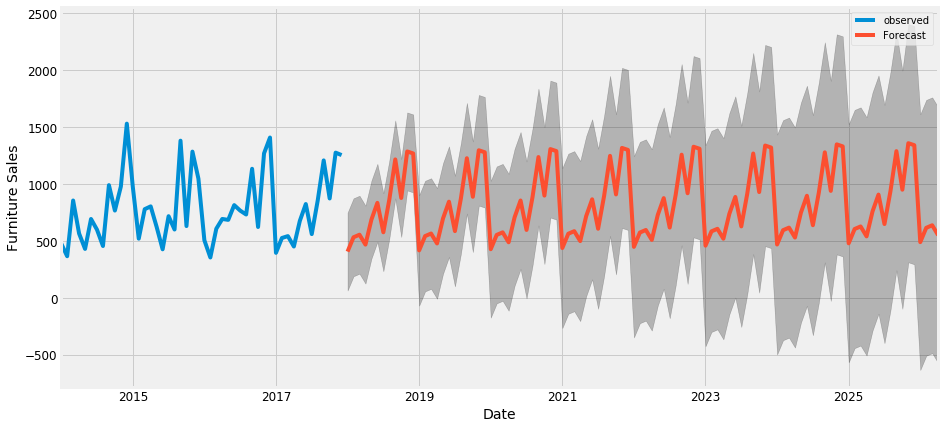

In [42]:
pred_uc = results.get_forecast(steps=100) # steps = número de predicciones
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()